Nuha BinTayyash, 2020

This notebook shows the ROC and precision-recall curves resulted from running GPcounts with one sample test on simulated bulk RNA-seq datasets.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
from scipy import stats

In [2]:
DESeq2 = pd.read_csv('fission_DESeq2_tst_scaled.csv',index_col=[0])
print(DESeq2.shape)
GPcounts_NB = pd.read_csv('ll_Negative_binomial_fission_normalized_counts_scaled.csv',index_col=[0])
GPcounts_G = pd.read_csv('ll_Gaussian_fission_normalized_counts_scaled.csv',index_col=[0])
print(GPcounts_NB.shape)
print(GPcounts_G.shape)

(6459, 6)
(6459, 4)
(6459, 4)


In [3]:
DESeq_sorted = DESeq2.sort_values(by=['pvalue'])
DESeq_sorted

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
SPNCRNA.1144,1.217305,8.521276,2.715801,9.341284e+00,0.002240,1
SPCC417.06c,1.412600,-5.961226,2.005189,8.669340e+00,0.003236,1
SPNCRNA.488,5.104772,-3.670428,1.277721,8.477169e+00,0.003596,1
SPAC1A6.08c,28.279930,1.553550,0.530327,8.324654e+00,0.003911,1
SPNCRNA.1387,1.468483,-5.613072,2.101783,8.097483e+00,0.004433,1
...,...,...,...,...,...,...
SPBC31F10.15c,441.505530,-0.000098,0.241508,1.484479e-07,0.999693,1
SPAC139.06,354.301526,-0.000020,0.248570,4.083859e-09,0.999949,1
SPNCRNA.1326,3.825882,-0.061994,3.192256,-4.851704e-04,1.000000,1
SPAC513.04,1.076923,-0.820488,3.293259,-2.406579e-02,1.000000,1


In [4]:
GPcounts_NB_sorted = GPcounts_NB.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_NB_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPNCRNA.757,-67.901960,-37.056663,452.321010,483.166307
SPBC887.07,-176.241596,-91.792989,-12.316352,72.132255
SPNCRNA.727,-195.130360,-81.452116,-77.811135,35.867109
SPAP27G11.13c,-281.553889,-126.768421,-125.209402,29.576066
SPAC186.05c,-207.496316,-88.502752,-89.823846,29.169718
...,...,...,...,...
SPAC11E3.14,-229.250318,-142.203674,-141.752276,-54.705631
SPCC1183.11,-262.047533,-158.642229,-158.257376,-54.852073
SPBC4B4.08,-298.151794,-177.096589,-178.714398,-57.659193
SPAC2C4.17c,-241.517819,-150.100422,-149.079798,-57.662400


In [7]:
genes_name = ['SPNCRNA.750','SPBTRNAARG.07','SPNCRNA.735','SPBPB2B2.06c','SPAC869.06c','SPCC1281.04','SPBC1711.14','SPAC11D3.01c']
GPcounts_NB.loc[genes_name]

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPNCRNA.750,-74.152538,-42.218700,-31.763184,0.170654
SPBTRNAARG.07,-219.672059,-105.340024,-113.982160,0.349876
SPNCRNA.735,-132.432735,-66.956764,-63.711706,1.764265
SPBPB2B2.06c,-119.192684,-60.485356,-57.312291,1.395036
SPAC869.06c,-109.093529,-58.660938,-48.272986,2.159605
SPCC1281.04,-146.119584,-77.166141,-65.486253,3.467190
SPBC1711.14,-82.881674,-43.453919,-37.440495,1.987259
SPAC11D3.01c,-229.365284,-119.660089,-103.830159,5.875037


In [8]:
GPcounts_G.loc[genes_name]

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPNCRNA.750,-42.200478,-25.441840,-18.933791,-2.175153
SPBTRNAARG.07,-20.635520,-8.526115,-12.283096,-0.173691
SPNCRNA.735,-29.819021,-21.763828,-15.829874,-7.774680
SPBPB2B2.06c,-51.239404,-27.530745,-24.331187,-0.622528
SPAC869.06c,-48.531642,-24.645012,-24.603391,-0.716760
SPCC1281.04,-47.501467,-27.585391,-19.397972,0.518104
SPBC1711.14,-37.759425,-21.306746,-17.081666,-0.628986
SPAC11D3.01c,-29.525785,-18.196204,-7.877604,3.451977


In [7]:
D = GPcounts_NB.shape[0]
true_label = np.zeros(D)
for j in range(D):
    if GPcounts_NB['log_likelihood_ratio'][j] > 0:
        true_label[j] = 1
labels = pd.DataFrame(true_label, index =GPcounts_NB.index.values, columns =['label'])
GPcounts_NB = pd.concat([GPcounts_NB,labels],axis = 1)

In [29]:
TP_genes_NB = list(GPcounts_NB.loc[(GPcounts_NB['log_likelihood_ratio'] > 0)&(GPcounts_NB['log_likelihood_ratio'] < 1)&(GPcounts_NB['label']==1.0)].index.values)
len(TP_genes_NB)

290

In [30]:
FP_genes_G = list(GPcounts_G.loc[(GPcounts_G['log_likelihood_ratio'] < 0)&(GPcounts_NB['label']==1.0)].index.values)
FP_genes_G

['SPAC212.01c',
 'SPAC1F8.06',
 'SPAC11D3.01c',
 'SPNCRNA.610',
 'SPNCRNA.638',
 'SPNCRNA.653',
 'SPAC227.08c',
 'SPNCRNA.676',
 'SPAC4G8.12c',
 'SPNCRNA.220',
 'SPAC139.02c',
 'SPNCRNA.717',
 'SPNCRNA.730',
 'SPAC1420.04c',
 'SPAC20G8.10c',
 'SPAC5D6.10c',
 'SPAC167.09',
 'SPAC23H4.16c',
 'SPAC664.12c',
 'SPAC23C11.07',
 'SPAC4G9.14',
 'SPNCRNA.818',
 'SPAC15F9.01c',
 'SPNCRNA.825',
 'SPNCRNA.847',
 'SPAC1805.18',
 'SPNCRNA.855',
 'SPNCRNA.856',
 'SPNCRNA.874',
 'SPATRNATHR.04',
 'SPAPB1E7.06c',
 'SPAPB1E7.10',
 'SPAC17A2.11',
 'SPNCRNA.921',
 'SPAC8C9.19',
 'SPNCRNA.927',
 'SPNCRNA.941',
 'SPAC2F3.04c',
 'SPNCRNA.240',
 'SPAC27E2.02',
 'SPAC27E2.14',
 'SPNCRNA.979',
 'SPAC29E6.04',
 'SPAC17C9.14',
 'SPAC637.11',
 'SPNCRNA.1000',
 'SPAC12B10.08c',
 'SPNCRNA.1006',
 'SPNCRNA.1013',
 'SPNCRNA.1017',
 'SPNCRNA.1022',
 'SPAC11H11.01',
 'SPNCRNA.1037',
 'SPAC890.02c',
 'SPAC22E12.02',
 'SPNCRNA.1044',
 'SPNCRNA.1060',
 'SPAC11E3.12',
 'SPNCRNA.1068',
 'SPNCRNA.267',
 'SPNCRNA.1089',
 'SPAC

In [31]:
#SPCC1281.04 SPBC1711.14
best =set(FP_genes_G).intersection(TP_genes_NB)
list(best)

['SPRRNA.41',
 'SPBC3D6.02',
 'SPAC19D5.06c',
 'SPNCRNA.750',
 'SPNCRNA.751',
 'SPNCRNA.638',
 'SPBC1271.01c',
 'SPNCRNA.1615',
 'SPNCRNA.1441',
 'SPNCRNA.33',
 'SPNCRNA.1624',
 'SPNCRNA.1260',
 'SPNCRNA.1172',
 'SPMITTRNACYS.01',
 'SPNCRNA.676',
 'SPBC18E5.03c',
 'SPNCRNA.913',
 'SPNCRNA.1043',
 'SPNCRNA.1010',
 'SPNCRNA.1633',
 'SPNCRNA.575',
 'SPAC227.08c',
 'SPAC27D7.05c',
 'SPBC1348.01',
 'SPBC21C3.18',
 'SPCC576.06c',
 'SPBTRNAVAL.07',
 'SPAC2F7.08c',
 'SPNCRNA.730',
 'SPNCRNA.1273',
 'SPCC4B3.08',
 'SPCC162.03',
 'SPNCRNA.629',
 'SPAC11H11.01',
 'SPAC27E2.14',
 'SPNCRNA.1089',
 'SPNCRNA.40',
 'SPNCRNA.1672',
 'SPNCRNA.472',
 'SPNCRNA.1185',
 'SPNCRNA.803',
 'SPAC212.01c',
 'SPAC806.05',
 'SPNCRNA.51',
 'SPNCRNA.100',
 'SPBC649.03',
 'SPBC1604.09c',
 'SPNCRNA.1078',
 'SPNCRNA.1561',
 'SPAPB1E7.10',
 'SPNCRNA.895',
 'SPNCRNA.244',
 'SPCC1620.02',
 'SPCC330.19c',
 'SPNCRNA.1504',
 'SPBC31A8.02',
 'SPNCRNA.1006',
 'SPNCRNA.417',
 'SPBC56F2.10c',
 'SPNCRNA.348',
 'SPCC895.08c',
 'SPN

In [32]:
GPcounts_NB.loc[best]

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,label
SPRRNA.41,-124.436055,-63.220692,-60.865902,0.349461,1.0
SPBC3D6.02,-313.050516,-163.520936,-149.280406,0.249174,1.0
SPAC19D5.06c,-188.051334,-93.262634,-94.326456,0.462244,1.0
SPNCRNA.750,-74.152538,-42.218700,-31.763184,0.170654,1.0
SPNCRNA.751,-120.050134,-57.252688,-61.878518,0.918928,1.0
...,...,...,...,...,...
SPNCRNA.1304,-69.231002,-31.576751,-37.371807,0.282445,1.0
SPBC16E9.14c,-174.606149,-85.906424,-88.316073,0.383652,1.0
SPNCRNA.1502,-68.432971,-33.623986,-33.846784,0.962201,1.0
SPNCRNA.1690,-193.258797,-101.929536,-90.366437,0.962824,1.0


In [12]:
GPcounts_G.loc[best]

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPBC31F10.08,-41.234457,-23.006112,-21.513142,-3.284798
SPAPB1E7.06c,-29.987908,-13.608105,-18.123684,-1.743881
SPAC869.02c,-3.396214,-5.970348,-3.916131,-6.490266
SPNCRNA.642,-27.397846,-12.754524,-17.250443,-2.607120
SPAC1F12.08,-5.826880,-9.058812,3.847679,0.615746
...,...,...,...,...
SPBC3H7.13,8.783193,-1.316215,7.097688,-3.001720
SPNCRNA.1093,-38.754822,-22.048968,-15.791150,0.914704
SPNCRNA.953,-23.768356,-10.841449,-12.276733,0.650174
SPNCRNA.1160,-48.486029,-26.637938,-23.713666,-1.865574


In [13]:
GPcounts_G_sorted = GPcounts_G.sort_values(by=['log_likelihood_ratio'], ascending=False)
GPcounts_G_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPAC186.05c,-71.918162,-37.138466,1.571749,36.351445
SPAC869.01,-42.050219,-25.453980,0.831360,17.427599
SPBC23G7.10c,-73.918511,-35.621108,-21.053542,17.243861
SPNCRNA.1628,-48.976339,-27.811865,-4.185531,16.978942
SPNCRNA.1457,-23.656210,-4.212082,-2.501343,16.942786
...,...,...,...,...
SPBC651.08c,22.856545,-2.674657,0.256785,-25.274417
SPBC4C3.05c,22.426259,-0.398700,-2.817688,-25.642648
SPAC1B1.03c,28.764797,0.265070,2.752599,-25.747128
SPAC140.02,3.109758,-6.785920,-15.991657,-25.887335


0.1
645
nan nan


/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


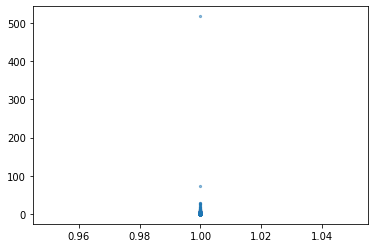

nan nan


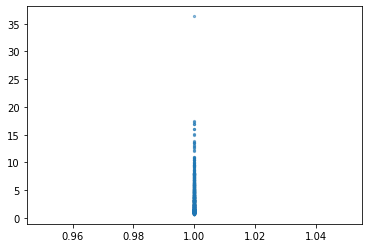

0.2
1291
nan nan


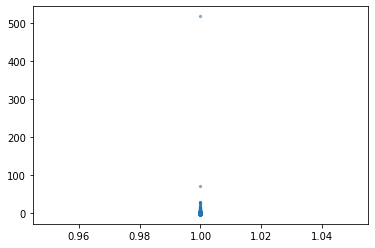

nan nan


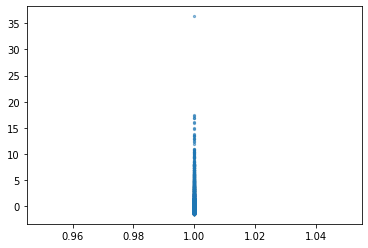

0.30000000000000004
1937
nan nan


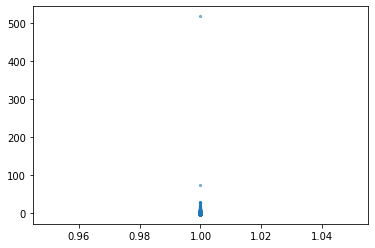

nan nan


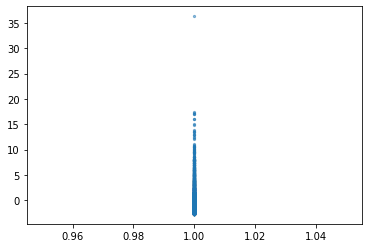

0.4
2583
nan nan


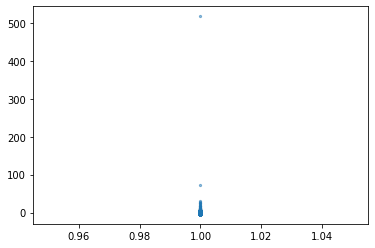

nan nan


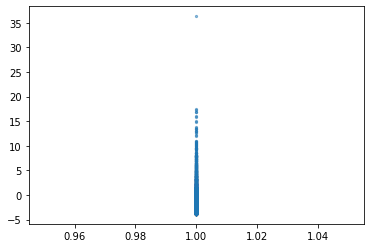

0.5
3229
nan nan


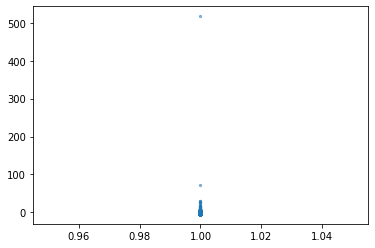

nan nan


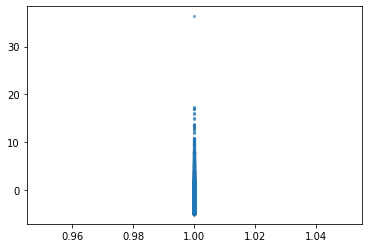

0.6000000000000001
3875
nan nan


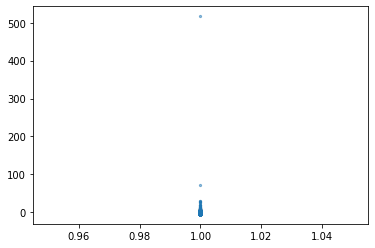

nan nan


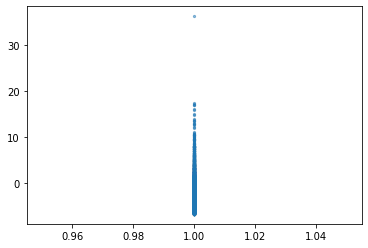

0.7000000000000001
4521
nan nan


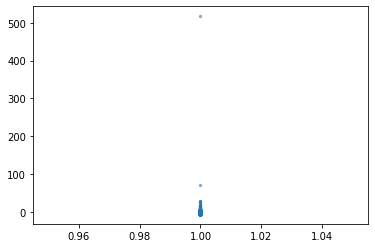

nan nan


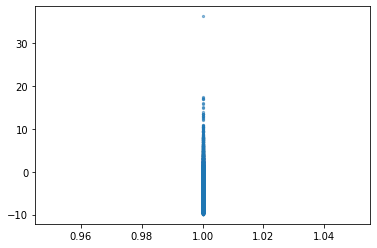

0.8
5167
nan nan


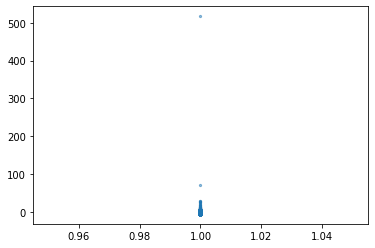

nan nan


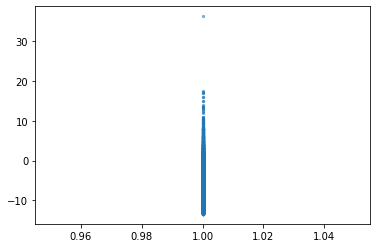

0.9
5813
nan nan


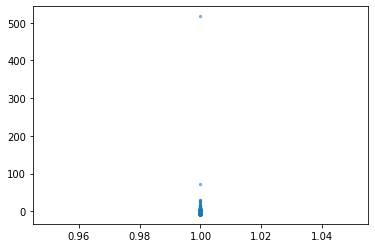

nan nan


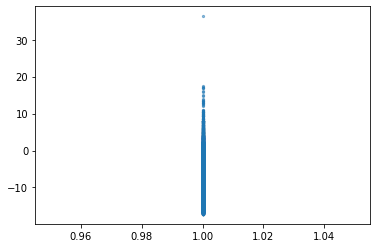

1.0
6459
nan nan


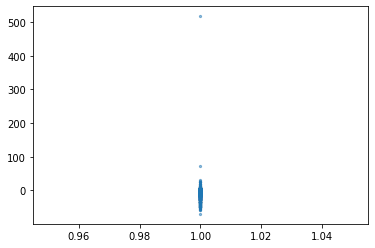

nan nan


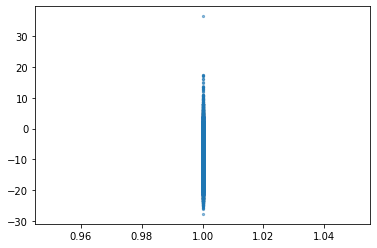

In [14]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
DESeq_id = list(DESeq_sorted.index.values)
GPcounts_NB_id = list(GPcounts_NB_sorted.index)
GPcounts_G_id = list(GPcounts_G_sorted.index)
corr_NB = []
corr_G = []

for count in range(10):
    print(percentage[count])
    print(int(len(DESeq_id) * percentage[count]))
    DESeq_id_part= DESeq_id[int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])]
    '''
    GPcounts_NB_index_part = []
    GPcounts_G_index_part = []
    for i in DESeq_id_part:
        GPcounts_NB_index_part.append(GPcounts_NB_id.index(i))
        GPcounts_G_index_part.append(GPcounts_G_id.index(i))
    
    DESeq_index_part = list(range(0,len(DESeq_id_part)))
    '''
    rho, pval = stats.spearmanr(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],GPcounts_NB_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])])
    print(rho,pval)
    corr_NB.append(rho)
    plt.scatter(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])] ,GPcounts_NB_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],s=5,alpha=0.5)
    plt.show() 
    
    rho, pval = stats.spearmanr(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],GPcounts_G_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])])
    print(rho,pval)
    corr_G.append(rho)
    plt.scatter(DESeq_sorted['padj'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])] ,GPcounts_G_sorted['log_likelihood_ratio'][int(len(DESeq_id) * .0) : int(len(DESeq_id) * percentage[count])],s=5,alpha=0.5)
    plt.show() 
    '''
    rho, pval = stats.spearmanr(DESeq_index_part,GPcounts_G_index_part)
    print(rho)
    corr_G.append(rho)
    plt.scatter(DESeq_index_part ,GPcounts_G_index_part,s=5,alpha=0.5)
    plt.show() 
    '''

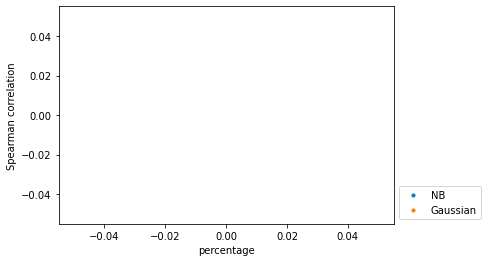

In [15]:
plt.scatter(percentage,corr_NB,s=10,label = 'NB')
plt.scatter(percentage,corr_G,s=10,label = 'Gaussian')
plt.xlabel('percentage')
plt.ylabel('Spearman correlation')
plt.legend(bbox_to_anchor=(1, 0), loc='lower left', ncol=1)

sort GPcounts results according to DESeq2 

In [16]:
GPcounts_NB_DESeq_sorted = GPcounts_NB.reindex(list(DESeq_sorted.index.values))
GPcounts_NB_DESeq_sorted 

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio,label
SPNCRNA.1144,-46.838541,-18.310911,-26.930489,1.597142,1.0
SPCC417.06c,-52.096218,-27.622742,-23.361360,1.112115,1.0
SPNCRNA.488,-96.883990,-45.829335,-49.393406,1.661249,1.0
SPAC1A6.08c,-142.971539,-70.438917,-71.753863,0.778759,1.0
SPNCRNA.1387,-55.048429,-25.431536,-25.753000,3.863893,1.0
...,...,...,...,...,...
SPBC31F10.15c,-210.188921,-109.161980,-105.645003,-4.618062,0.0
SPAC139.06,-200.461820,-106.235256,-102.106749,-7.880185,0.0
SPNCRNA.1326,-61.228290,-33.729938,-27.685083,-0.186731,0.0
SPAC513.04,-40.188267,-30.364343,-8.121806,1.702119,1.0


In [17]:
GPcounts_G_DESeq_sorted = GPcounts_G.reindex(list(DESeq_sorted.index.values))
GPcounts_G_DESeq_sorted

,Shared_log_likelihood,model_1_log_likelihood,model_2_log_likelihood,log_likelihood_ratio
SPNCRNA.1144,-38.215401,-13.703977,-21.140347,3.371076
SPCC417.06c,-36.284327,-20.201398,-16.049192,0.033737
SPNCRNA.488,-47.781368,-22.902778,-24.038713,0.839877
SPAC1A6.08c,-25.981253,-14.034154,-11.107024,0.840074
SPNCRNA.1387,-38.128844,-21.566273,-15.701424,0.861147
...,...,...,...,...
SPBC31F10.15c,16.824700,1.521699,3.630413,-11.672588
SPAC139.06,9.281716,-0.295143,3.214941,-6.361919
SPNCRNA.1326,-43.633812,-26.274460,-11.680004,5.679348
SPAC513.04,-38.269779,-24.014913,0.831360,15.086226


/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/nuhabintayyash/opt/anaconda3/envs/myen

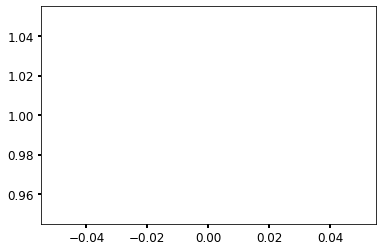

In [18]:
percentage = np.array(list(range(1,11)))
percentage = percentage * .10
fig = plt.figure()

dfs = [GPcounts_G_DESeq_sorted['log_likelihood_ratio']]#,GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
for df in range(len(dfs)):
    for i in range(10):
        D =int(len(DESeq_id) * percentage[i])
        true_label = np.zeros(D)

        for j in range(D):
            if DESeq_sorted['padj'][j] <= .005 :
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values[0:D], columns =['label'])

        precision_NB, recall_NB, thresholds_NB = metrics.precision_recall_curve(labels['label'],dfs[df][0:D])

        plt.plot( recall_NB,precision_NB,label=str(int(percentage[i]*100))+'%')
        plt.tick_params(labelsize='large', width=2) 
        #plt.xlabel('recall')
        #plt.ylabel('precision')
        #plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            title = 'GPcounts with NB likelihood'
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        
    plt.show()


{0.0: 6459}
{0.0: 6459}


/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


{0.0: 6459}


/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


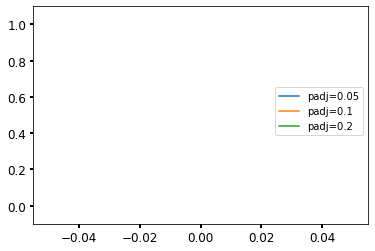

{0.0: 6459}
{0.0: 6459}


/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


{0.0: 6459}


/Users/nuhabintayyash/opt/anaconda3/envs/myenv2/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


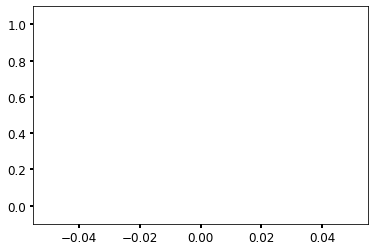

In [19]:
padj = [.05,.1,.2]
DESeq_id = list(DESeq_sorted.index.values)
fig = plt.figure()

dfs = [GPcounts_NB_DESeq_sorted['log_likelihood_ratio'],GPcounts_G_DESeq_sorted['log_likelihood_ratio']]
D = len(DESeq_sorted)

for df in range(len(dfs)):
    D = len(DESeq_sorted)
    for i in range(3):
        true_label = np.zeros(D)
  

        for j in range(D):
            if DESeq_sorted['padj'][j] <= padj[i]:
                true_label[j] = 1

        labels = pd.DataFrame(true_label, index =DESeq_sorted.index.values, columns =['label'])
        
        unique, counts = np.unique(true_label, return_counts=True)
        
        print(dict(zip(unique, counts)))
        precision, recall, thresholds = metrics.precision_recall_curve(labels['label'],dfs[df])

        plt.plot( recall,precision,label='padj='+str(padj[i]))
        plt.tick_params(labelsize='large', width=2) 
        '''
        plt.xlabel('recall')
        plt.ylabel('precision')
        plt.legend(loc='best', bbox_to_anchor=(1.22, .75))
        '''
        if df == 0:
            plt.legend(loc='best', bbox_to_anchor=(1., .65))
        
            #title = 'GPcounts with NB likelihood'
        '''
        else:
            title = 'GPcounts with Gaussian likelihood'
            
        plt.title(title )
        '''
        plt.ylim([-.1,1.1])
        
    plt.show()
